# Precision and Recall
Precision and recall is used to measure the performance of a classifier. Precision is defined as the number of true positives (Tp) divided by the sum of true positives and false positives (Fp):
* P = TP/(TP + FP)

While the recall is defined as the true positives divided by the sum of true positives and false negatives (Fn):
* R = TP/(TP + FN)

Both can have values between 0 and 1.

As an example lets say that you have developed a model that tries to predict if someone is infected with a virus that has spread all around the world (0 for not infected and 1 for infected). In order to measure the performance of your model you testing set is found (a group of people that you know for a fact if they are infected or not) and you use your model to predict who is infected. The results are the following:

* Test_set = [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
* Predictions = [0, 0, 1, 1, 1, 1, 0, 0, 0, 0]

The model’s precision and recall is:
* P = 3/(3+1) = 0.75
* R = 3/(3+2) = 0.6

However, your model, in this case a classifier, besides giving you a prediction (0s and 1s), it can also give you a probability (a number between 0 and 1).  In that case you can plot curves for precision and recall as a function of the threshold. These allow you to chose a threshold to obtain the desired precision and recall.

As an example, the following block of code creates two lists: one for the true values targets (the testing set), and a second one with the “model” probabilities.


In [1]:
from random import random
import numpy as np

def generate_dummy_probs_true_y():
    '''
    This funciton returns two lists:
    * true_y: a list containing 0s and 1s (10000 elements)
    * probs: a list containing numbers between 0 and 1 (10000 elements)
    '''
    
    #Number of elements in the list
    N = 10000
    
    #Declaration of the lists
    probs = []
    true_y = []
    
    #populate the probs list with random numbers in the range 0 to 1
    for i in range(0, N):
        probs.append(random())
    
    #Populate the true_y list with
    for val in probs:
        if val > 0.5:
            true_y.append(1)
        if val <= 0.5:
            true_y.append(0)
    
        
    mu, sigma = 0, 0.15
    deltas = list(np.random.normal(mu, sigma, N))
    
    probs = [probs[i] + deltas[i] for i in range(0, N)]
    
    for i in range(0, N):
        if probs[i] > 1.0:
            probs[i] = 0.9999
        if probs[i] < 0:
            probs[i] = 0.001
    return true_y, probs

true_y, probs_y = generate_dummy_probs_true_y()

Ok, we have our testing set (true_y), and our predictions (probs_y), remember that these are just examples. 

We are now in the position of plotting the precision and recall curves, we will use the precision_recall_curve function from sklearn. This is a function that takes in the true y values plus the probabilities generated by our model, and return 3 lists, precision, recall and threshold. The following block of code produces these 3 lists:

In [2]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(true_y, probs_y)

The curves are plotted using the following code:

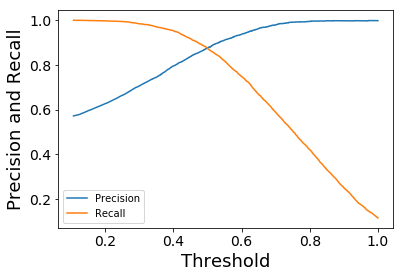

In [7]:
import matplotlib.pyplot as plt

plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.xlabel("Threshold", fontsize=18)
plt.ylabel("Precision and Recall", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.show()

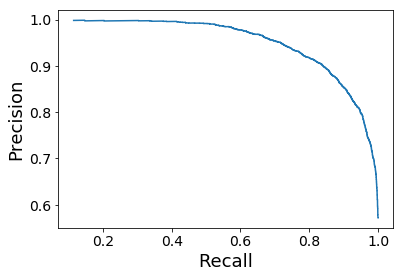

In [8]:
plt.plot(recall[:-1], precision[:-1])
plt.xlabel("Recall", fontsize=18)
plt.ylabel("Precision", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

As can be seen, the precision and recall curves have an inverse relation, as one increases, the other one decreases. This is always the case and is the tradeoff that all classifiers have.